No hold 30, 20, 40, 40

In [2]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_economic_choice_no_hold import EconomicChoiceEnv
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_firing_rates, plot_psychometric_curve

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

'/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' already in sys.path
Setup Complete.


Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-16 08:32:05.921624: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 10000 episodes...
Episode 100	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0086	Critic Loss: 0.0001
Episode 200	Total Reward: -0.08	State [1. 0. 0. 0.]	Actor Loss: 0.0020	Critic Loss: 0.0002
Episode 300	Total Reward: -0.09	State [1. 0. 0. 0.]	Actor Loss: -0.0062	Critic Loss: 0.0002
Episode 400	Total Reward: -0.06	State [1.  1.  0.2 0.1]	Actor Loss: 0.0312	Critic Loss: 0.0021
Episode 500	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0244	Critic Loss: 0.0003
Episode 600	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0053	Critic Loss: 0.0001
Episode 700	Total Reward: -0.07	State [1.  1.  1.  0.1]	Actor Loss: -0.0306	Critic Loss: 0.0012
Episode 800	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0608	Critic Loss: 0.0011
Episode 900	Total Reward: -0.08	State [1. 0. 0. 0.]	Actor Loss: -0.0520	Critic Loss: 0.0012
Episode 1000	Total Reward: 2.04	State [ 0.  -1.   0.   0.2]	Actor Loss: 0.1918	Critic Loss: 1.8576
Episode 

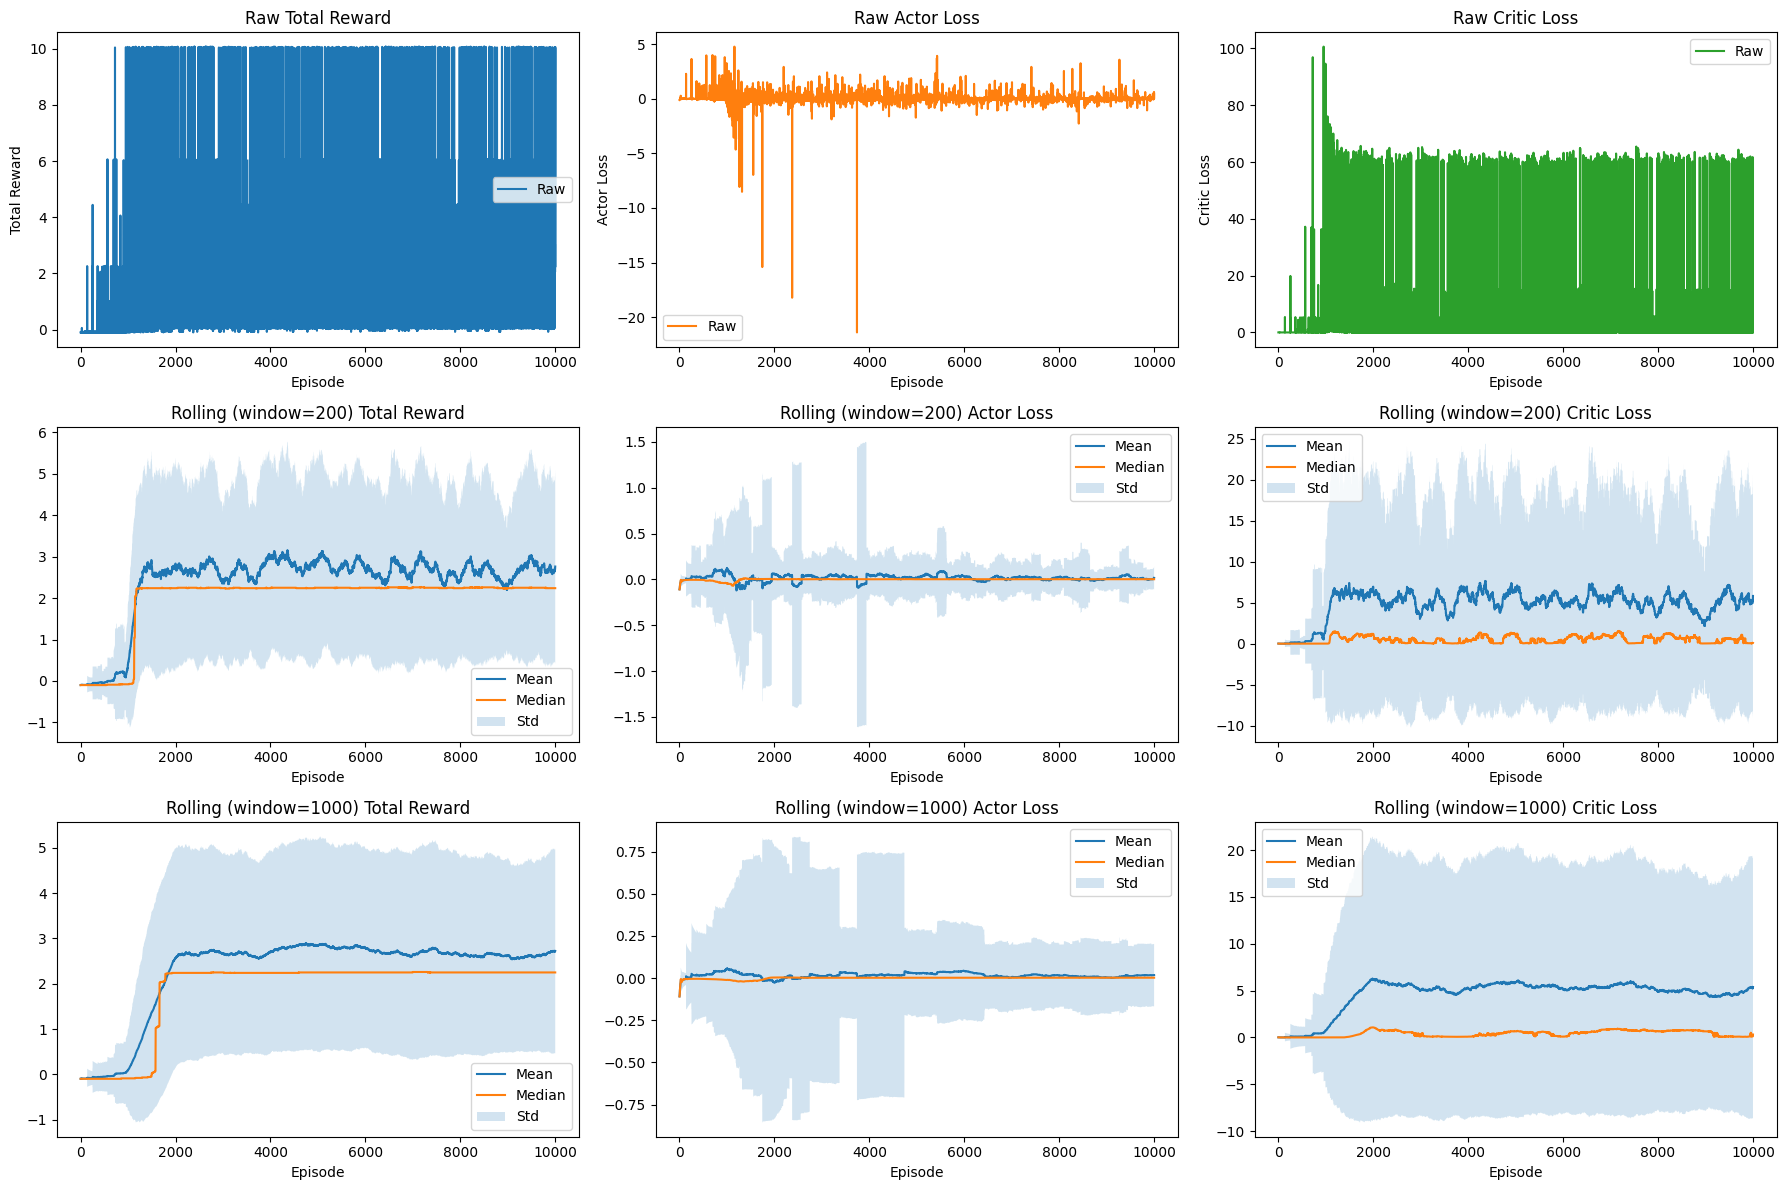

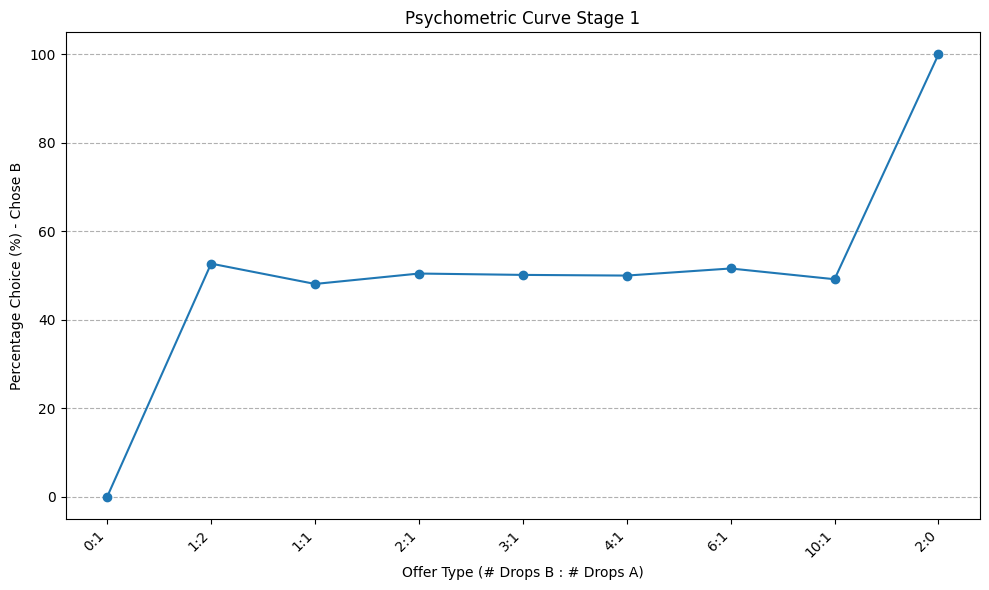

Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, \
    actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Save checkpoint ---
    ckpt_dir = 'checkpoints/rnn_nohold_max_stage_1'
    os.makedirs(ckpt_dir, exist_ok=True)
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, ckpt_dir, max_to_keep=3)
    saved_path = manager.save()
    print(f"Checkpoint saved at: {saved_path}")

    # --- Dummy forward to create masks ---
    print("Performing dummy forward to create sparse masks...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    dummy_critic_input = tf.zeros(
        (1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Save Sparse Masks ---
    print("Saving masks for stage 1...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_actor_layer{i}_kernel.npy'),
                layer.kernel_constraint.mask.numpy()
            )
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_actor_layer{i}_recur.npy'),
                layer.recurrent_constraint.mask.numpy()
            )
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_critic_layer{i}_kernel.npy'),
                layer.kernel_constraint.mask.numpy()
            )
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_critic_layer{i}_recur.npy'),
                layer.recurrent_constraint.mask.numpy()
            )
    print("Masks saved for stage 1.")

    # --- Plot Training Metrics & Psychometric Curve ---
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )
    plot_psychometric_curve(
        measurements_juices,
        title="Psychometric Curve Stage 1"
    )

    # --- Close Environment ---
    print("Closing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_1/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 10.04	State [ 0.  -1.   0.1  1. ]	Actor Loss: 0.0162	Critic Loss: 58.7725
Episode 200	Total Reward: 6.02	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0198	Critic Loss: 15.7343
Episode 300	Total Reward: 2.24	State [0.  1.  0.  0.1]	Actor Loss: 0.0023	Critic Loss: 0.0050
Episode 400	Total Reward: 3.04	State [ 0.  -1.   0.1  0.3]	Actor Loss: 0.0035	Critic Loss: 0.4577
Episode 500	Total Reward: 2.22	State [0.  1.  0.1 0.1]	Actor Loss: 0.0021	Critic Loss: 0.0006
Episode 600	Total Reward: 2.23	State [0.  1.  0.1 0.1]	Actor Loss: 0.0020	Critic Loss: 0.0007
Episode 700	Total Reward: 0.04	State [0.  1.  0.2 0. ]	Actor Loss: -0.0044	Critic Loss: 4.7988
Episode 800	Total Reward: -0.04	State [1.  1.  0.2 0.1]	Actor Loss: -0.2211	Critic Loss: 5.2480
Episode 900	Total Reward: 6.07	State [ 0.  -1.   0.1  0.6]	Acto

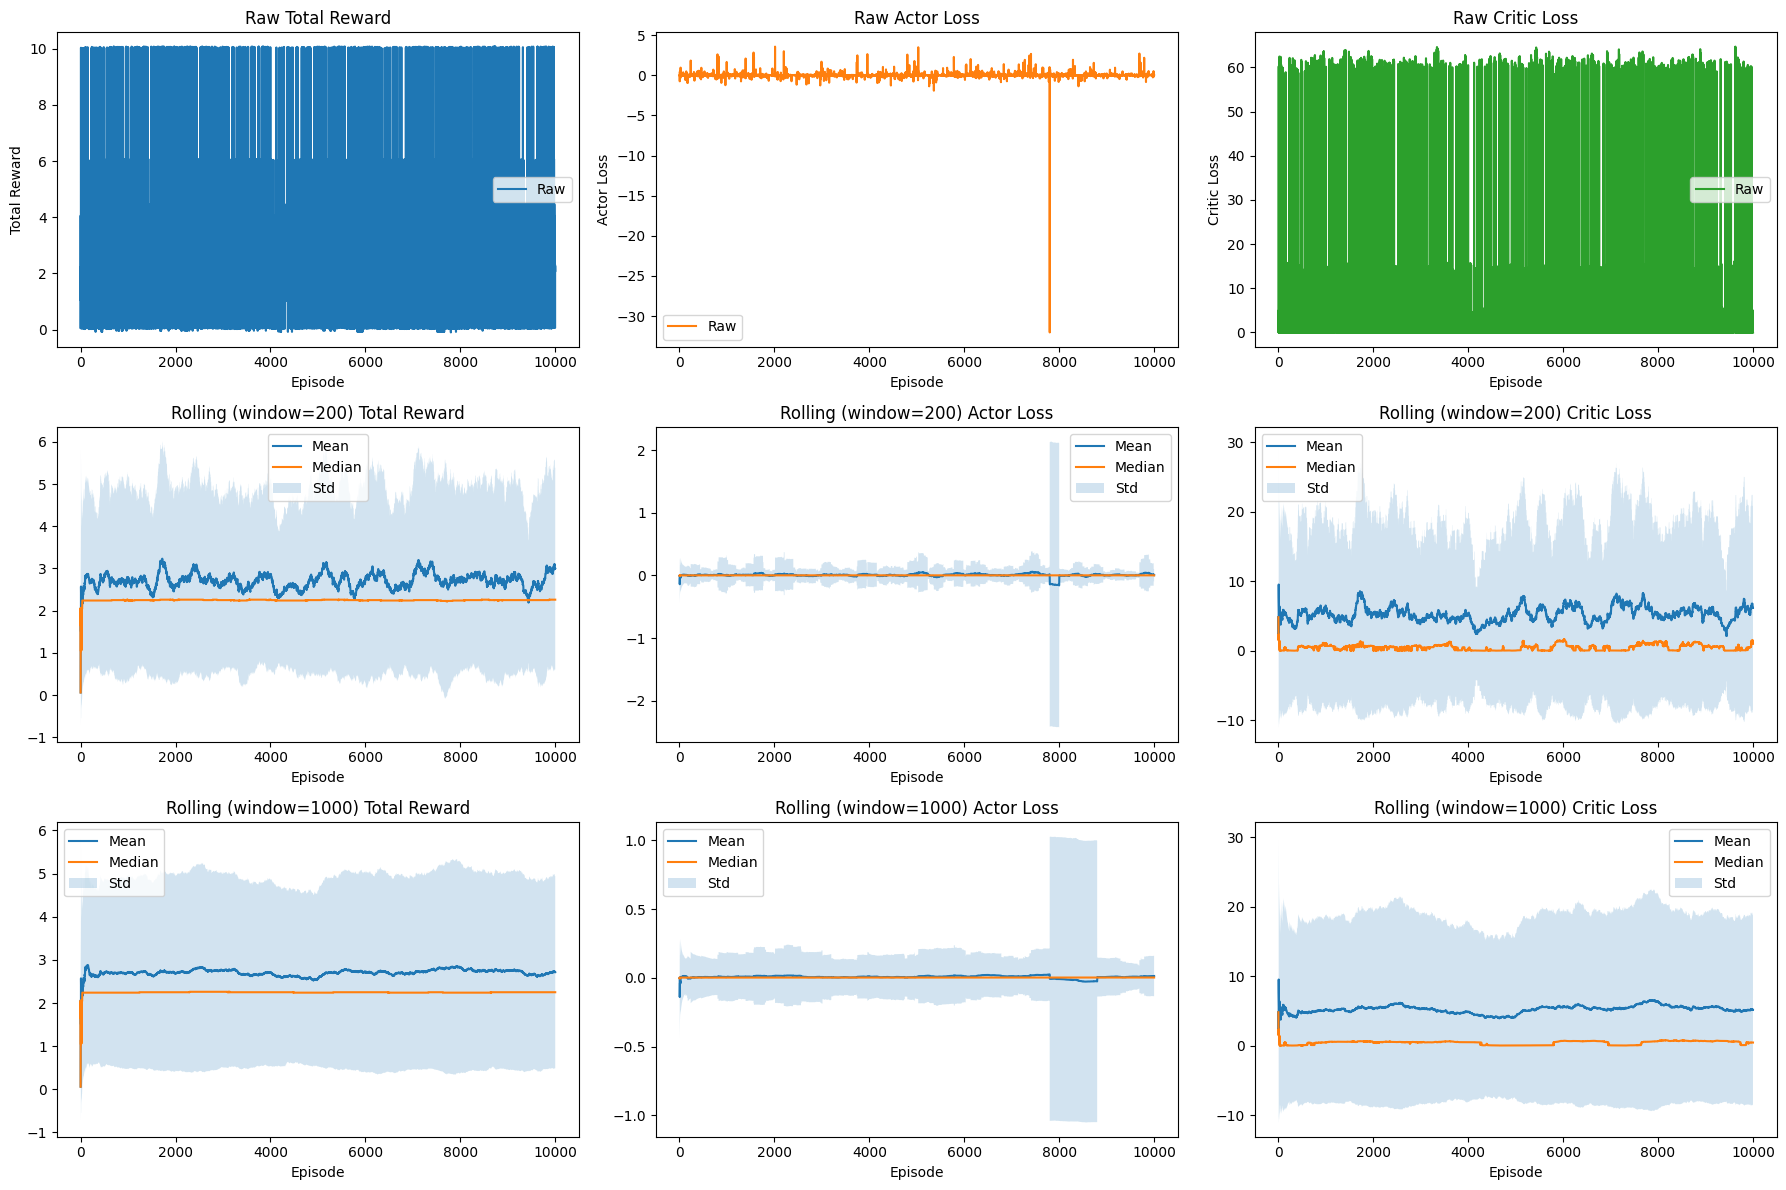

Plotting psychometric curve...


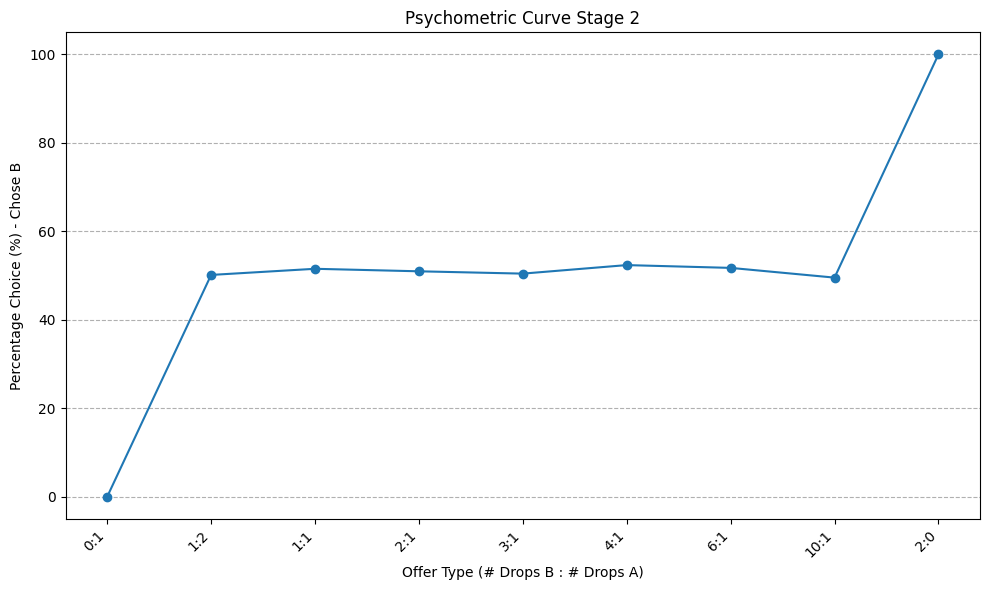

Closing environment...
Done.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_1'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_2'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 1 ---
    print("Loading masks from stage 1...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage1_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage1_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage1_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage1_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 1 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 2 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 2 finished.")

    # --- Save Checkpoint Stage 2 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 2 saved at: {path}")

    # --- Save Sparse Masks Stage 2 ---
    print("Saving masks for stage 2...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 2.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()


Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-16 11:31:27.430137: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_2/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 0.04	State [0.  1.  0.2 0. ]	Actor Loss: 0.0014	Critic Loss: 5.0001
Episode 200	Total Reward: 6.06	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0376	Critic Loss: 15.0734
Episode 300	Total Reward: 2.26	State [0.  1.  0.6 0.1]	Actor Loss: 0.0008	Critic Loss: 0.0004
Episode 400	Total Reward: 3.05	State [ 0.  -1.   0.1  0.3]	Actor Loss: 0.0030	Critic Loss: 0.7671
Episode 500	Total Reward: 2.23	State [0.  1.  0.6 0.1]	Actor Loss: 0.0024	Critic Loss: 0.0041
Episode 600	Total Reward: 2.25	State [0.  1.  0.3 0.1]	Actor Loss: -0.0071	Critic Loss: 0.0048
Episode 700	Total Reward: 2.24	State [0.  1.  0.

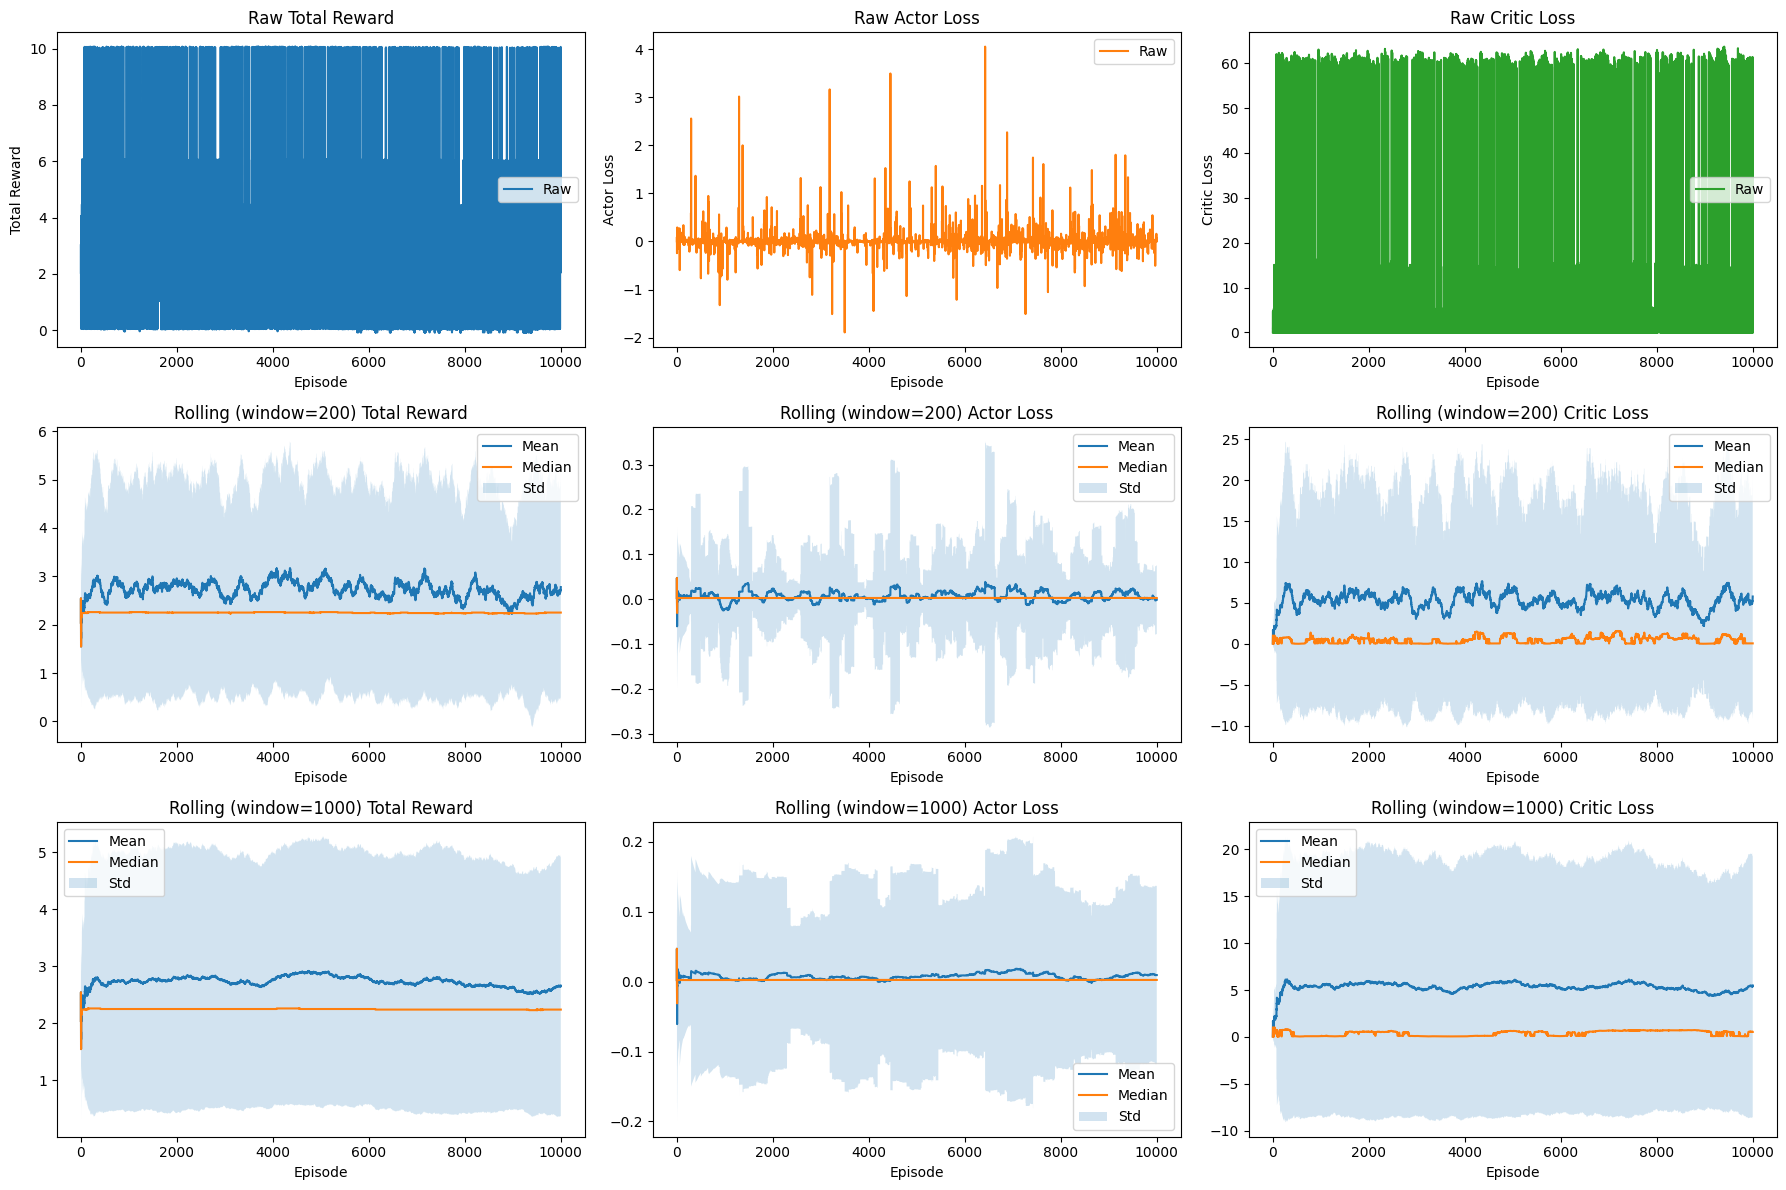

Plotting psychometric curve...


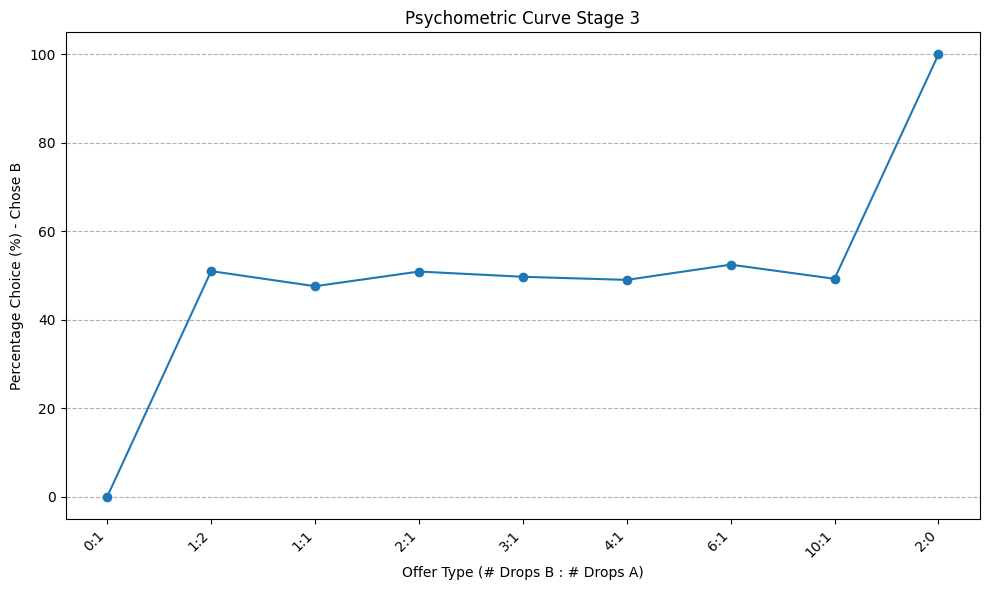

Closing environment...
Done.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_2'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_3'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 2 ---
    print("Loading masks from stage 2...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage2_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage2_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage2_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage2_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 2 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 3 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save Checkpoint Stage 3 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 3 saved at: {path}")

    # --- Save Sparse Masks Stage 3 ---
    print("Saving masks for stage 3...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 3.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 3")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-16 16:02:33.798227: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 3...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_3/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 0.05	State [0.  1.  0.2 0. ]	Actor Loss: 0.0021	Critic Loss: 4.8988
Episode 200	Total Reward: 6.05	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0216	Critic Loss: 15.0451
Episode 300	Total Reward: 2.24	State [0.  1.  0.6 0.1]	Actor Loss: 0.0023	Critic Loss: 0.0010
Episode 400	Total Reward: 3.04	State [ 0.  -1.   0.1  0.3]	Actor Loss: 0.0505	Critic Loss: 0.7510
Episode 500	Total Reward: 2.23	State [0.  1.  0.6 0.1]	Actor Loss: 0.0230	Critic Loss: 0.0036
Episode 600	Total Reward: 2.25	State [0.  1.  0.3 0.1]	Actor Loss: 0.0025	Critic Loss: 0.0043
Episode 700	Total Reward: 2.25	State [0.  1.  0.1

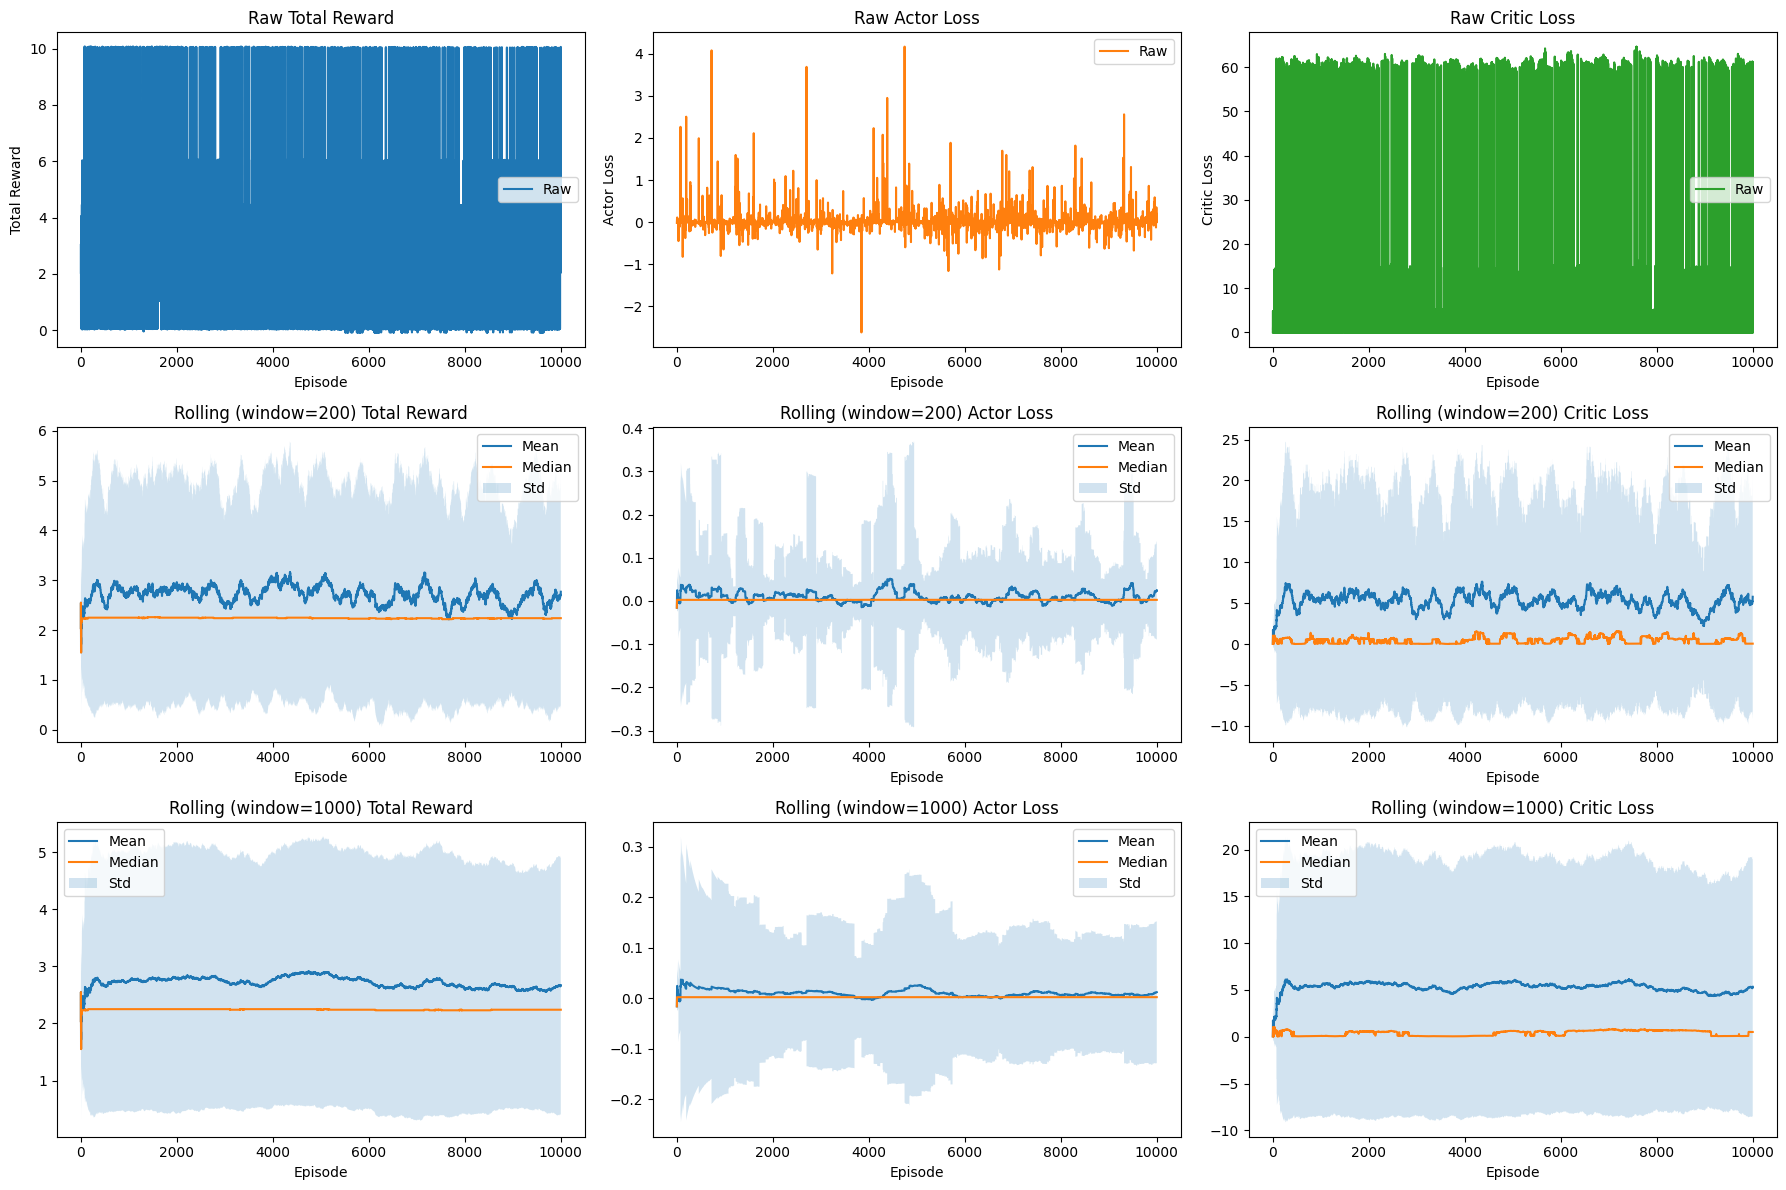

Plotting psychometric curve...


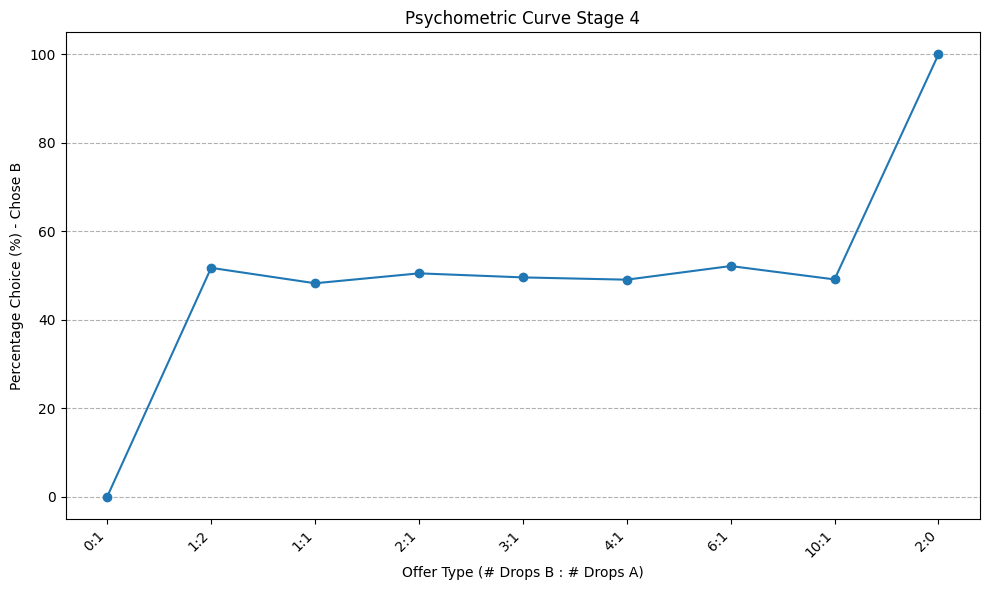

Closing environment...
Done.


: 

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_3'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_4'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 3 ---
    print("Loading masks from stage 3...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage3_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage3_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage3_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage3_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 3 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 4 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 4 finished.")

    # --- Save Checkpoint Stage 4 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 4 saved at: {path}")

    # --- Save Sparse Masks Stage 4 ---
    print("Saving masks for stage 4...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage4_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage4_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage4_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage4_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 4.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 4")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-17 01:03:39.928961: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_4/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 0.02	State [0.  1.  0.2 0. ]	Actor Loss: 0.0014	Critic Loss: 4.9257
Episode 200	Total Reward: 6.02	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0043	Critic Loss: 14.8990
Episode 300	Total Reward: 2.24	State [0.  1.  0.6 0.1]	Actor Loss: 0.0024	Critic Loss: 0.0006
Episode 400	Total Reward: 3.02	State [ 0.  -1.   0.1  0.3]	Actor Loss: 0.0043	Critic Loss: 0.7245
Episode 500	Total Reward: 2.22	State [0.  1.  0.6 0.1]	Actor Loss: 0.0027	Critic Loss: 0.0102
Episode 600	Total Reward: 2.23	State [0.  1.  0.3 0.1]	Actor Loss: 0.0116	Critic Loss: 0.0025
Episode 700	Total Reward: 2.22	State [0.  1.  0.1

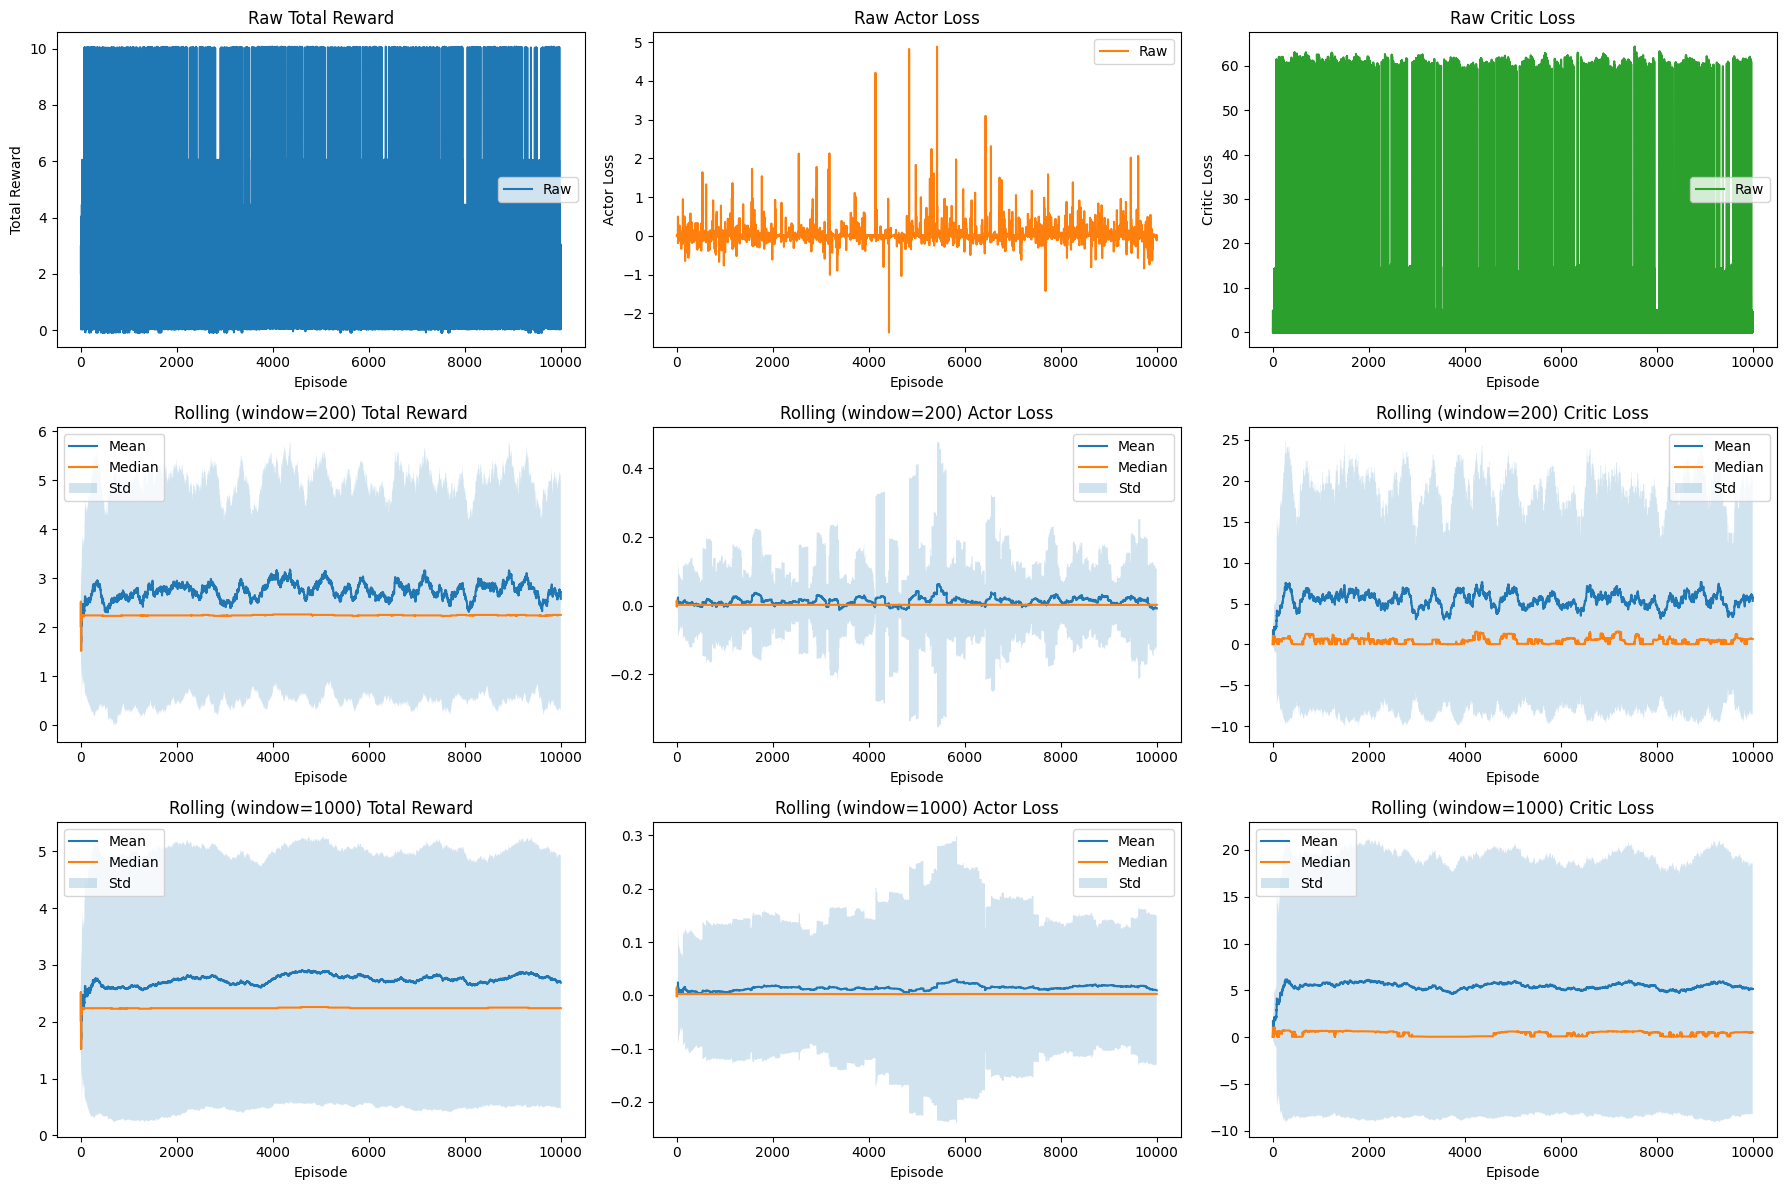

Plotting psychometric curve...


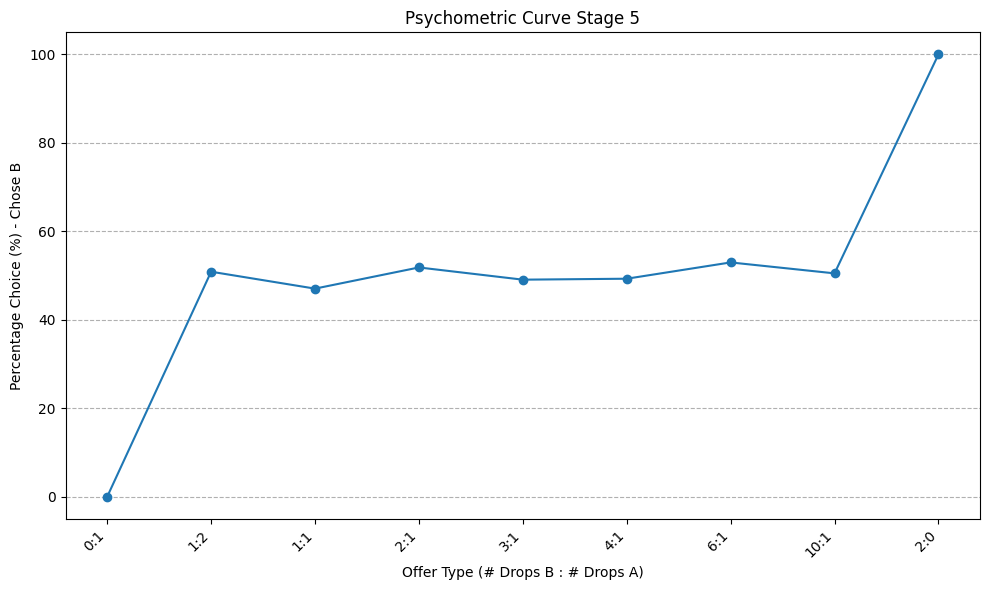

Closing environment...
Done.


: 

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_4'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_5'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 4 ---
    print("Loading masks from stage 4...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage4_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage4_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage4_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage4_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 4 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 5 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save Checkpoint Stage 5 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 5 saved at: {path}")

    # --- Save Sparse Masks Stage 5 ---
    print("Saving masks for stage 5...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage5_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage5_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage5_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage5_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 5.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 5")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 7500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-17 09:08:33.013839: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 6...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_5/ckpt-1
Checkpoint restored successfully.
Starting training for 7500 episodes...
Episode 100	Total Reward: 2.03	State [0.  1.  0.2 0. ]	Actor Loss: -0.0106	Critic Loss: 0.0102
Episode 200	Total Reward: 2.22	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0025	Critic Loss: 0.0033
Episode 300	Total Reward: 6.02	State [0.  1.  0.6 0.1]	Actor Loss: 0.0085	Critic Loss: 14.3906
Episode 400	Total Reward: 2.24	State [ 0.  -1.   0.1  0.3]	Actor Loss: 0.0023	Critic Loss: 0.0005
Episode 500	Total Reward: 6.04	State [0.  1.  0.6 0.1]	Actor Loss: 0.0157	Critic Loss: 14.9244
Episode 600	Total Reward: 3.06	State [0.  1.  0.3 0.1]	Actor Loss: 0.1506	Critic Loss: 0.7529
Episode 700	Total Reward: 1.05	State [0.  1.  0.

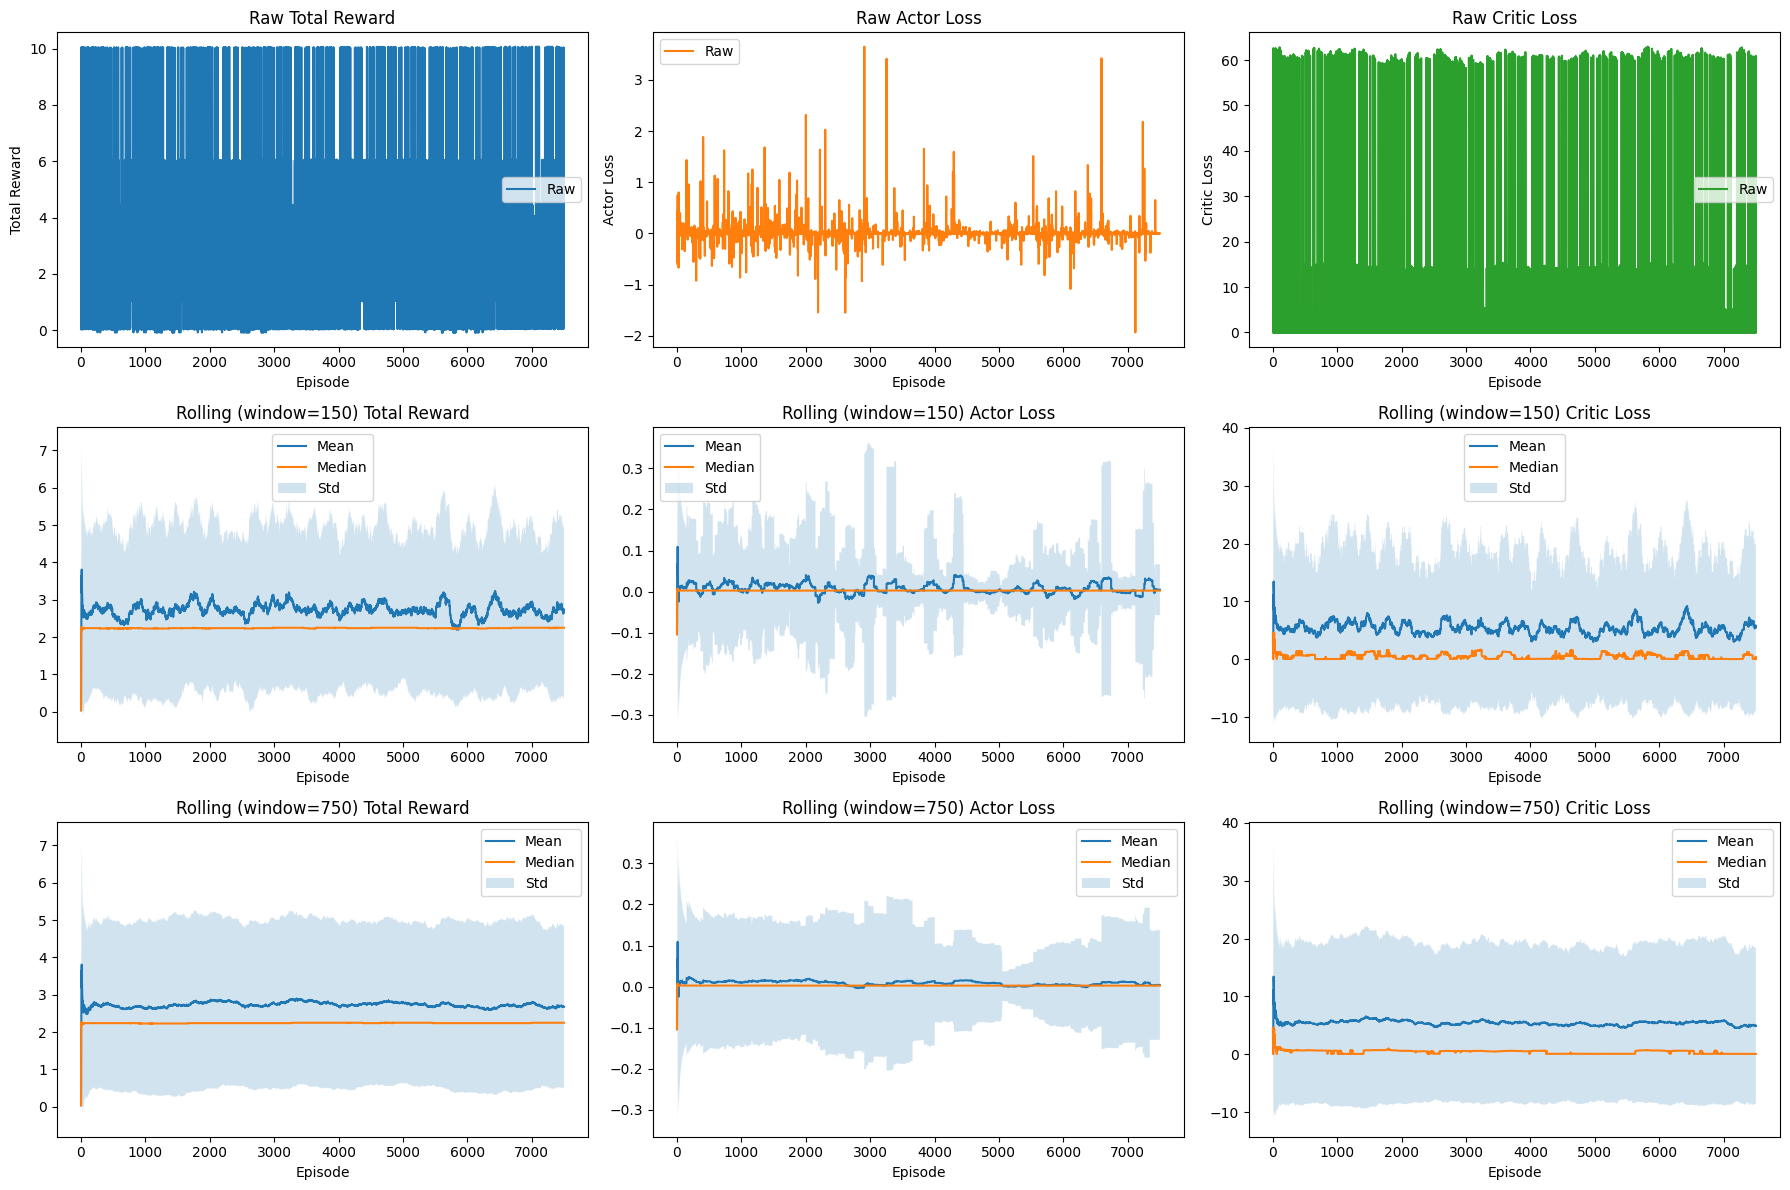

Plotting psychometric curve...


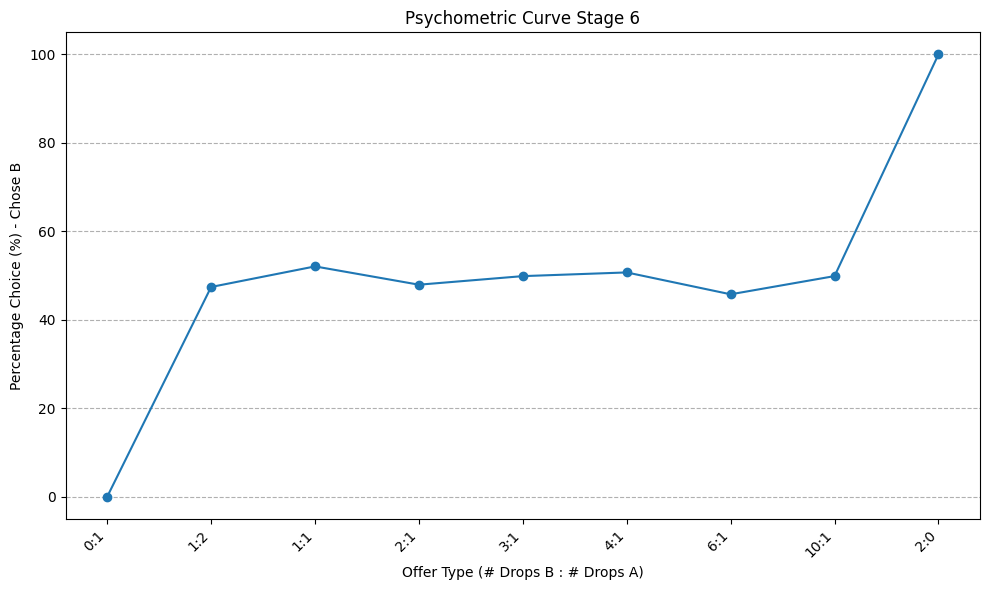

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 7500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_5'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_6'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 6 ---
    print("Loading masks from stage 6...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage5_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage5_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage5_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage5_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 5 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 6 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 6 finished.")

    # --- Save Checkpoint Stage 6 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 6 saved at: {path}")

    # --- Save Sparse Masks Stage 6 ---
    print("Saving masks for stage 6...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage6_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage6_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage6_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage6_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 6.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 6")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-05-17 11:15:11.858966: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 6...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_6/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 2.05	State [0.  1.  0.2 0. ]	Actor Loss: 0.0024	Critic Loss: 0.0136
Episode 200	Total Reward: 2.25	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0024	Critic Loss: 0.0021
Episode 300	Total Reward: 6.05	State [0.  1.  0.6 0.1]	Actor Loss: 0.0058	Critic Loss: 14.3798
Episode 400	Total Reward: 2.23	State [ 0.  -1.   0.1  0.3]	Actor Loss: -0.0054	Critic Loss: 0.0019
Episode 500	Total Reward: 6.04	State [0.  1.  0.6 0.1]	Actor Loss: 0.0529	Critic Loss: 14.8084
Episode 600	Total Reward: 3.06	State [0.  1.  0.3 0.1]	Actor Loss: 0.0243	Critic Loss: 0.6949
Episode 700	Total Reward: 1.03	State [0.  1.  0

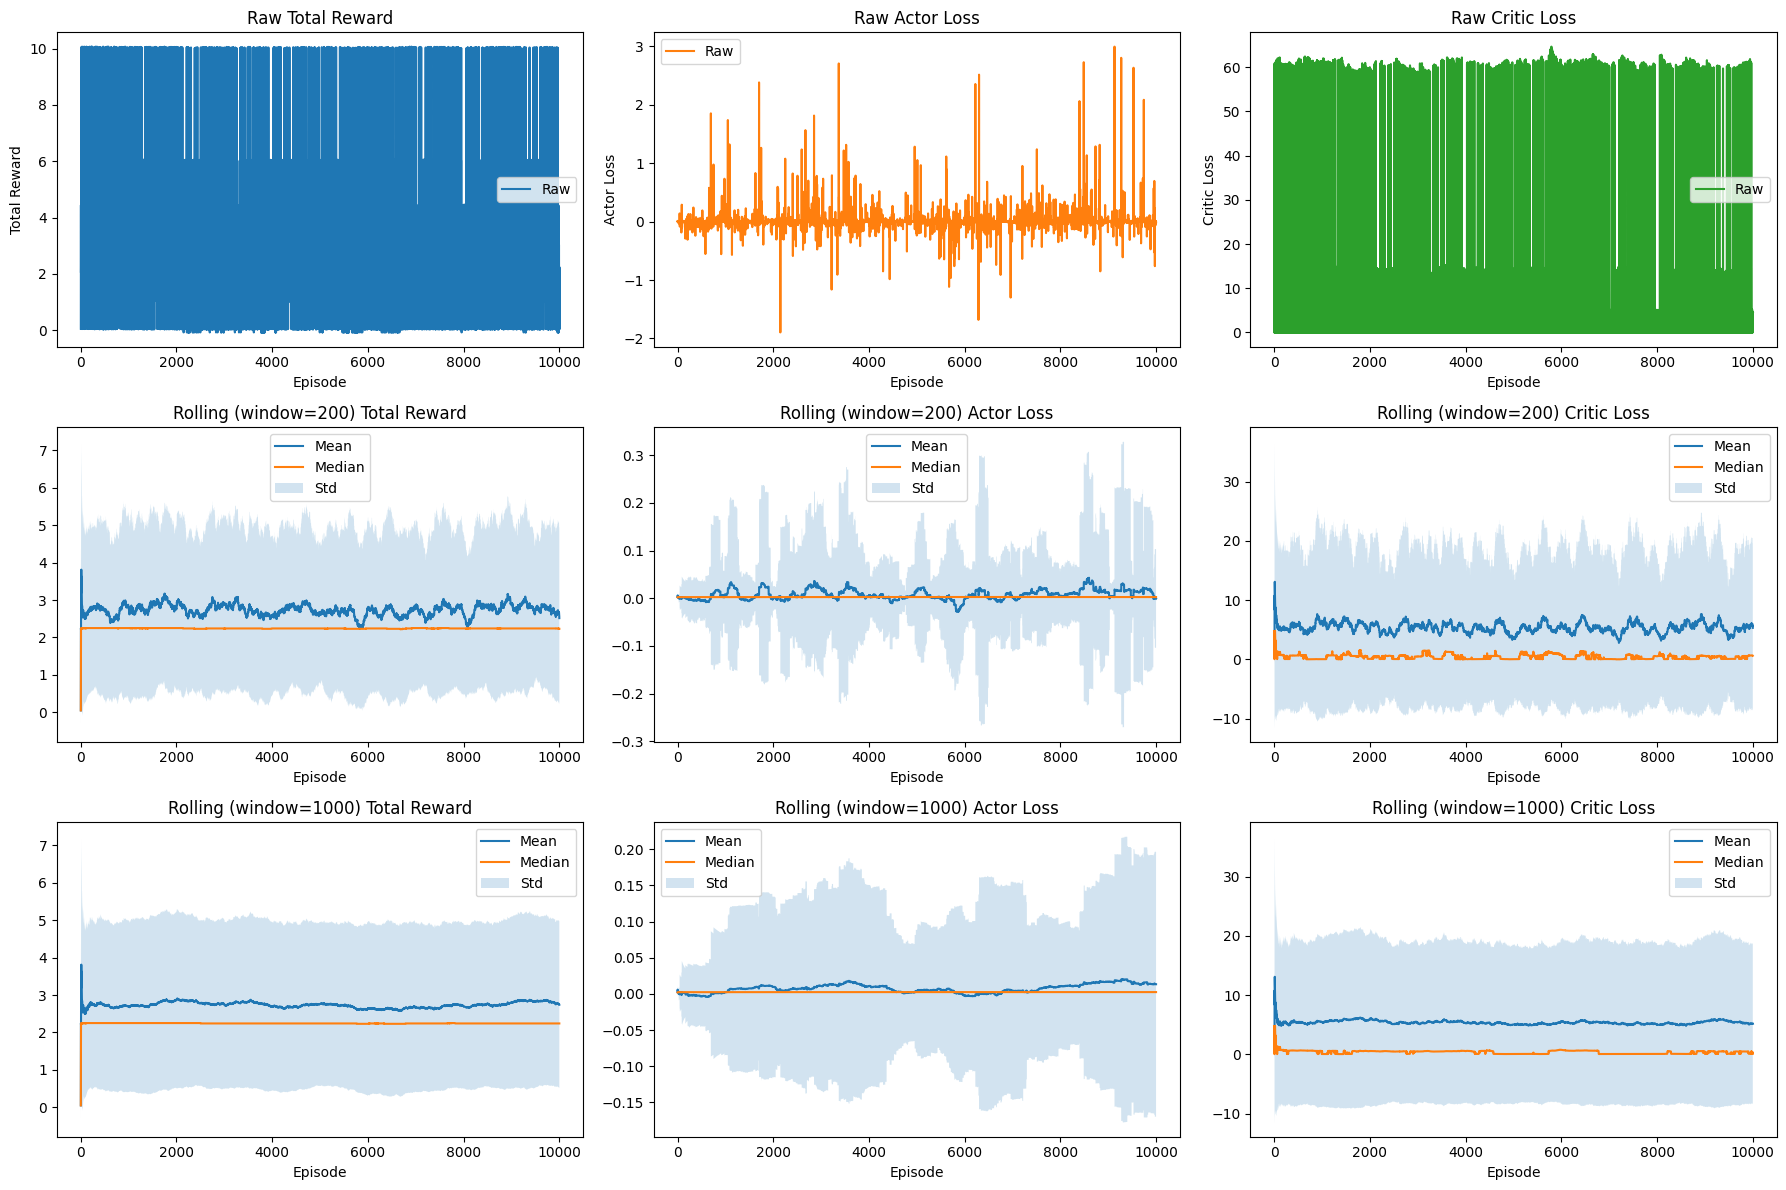

Plotting psychometric curve...


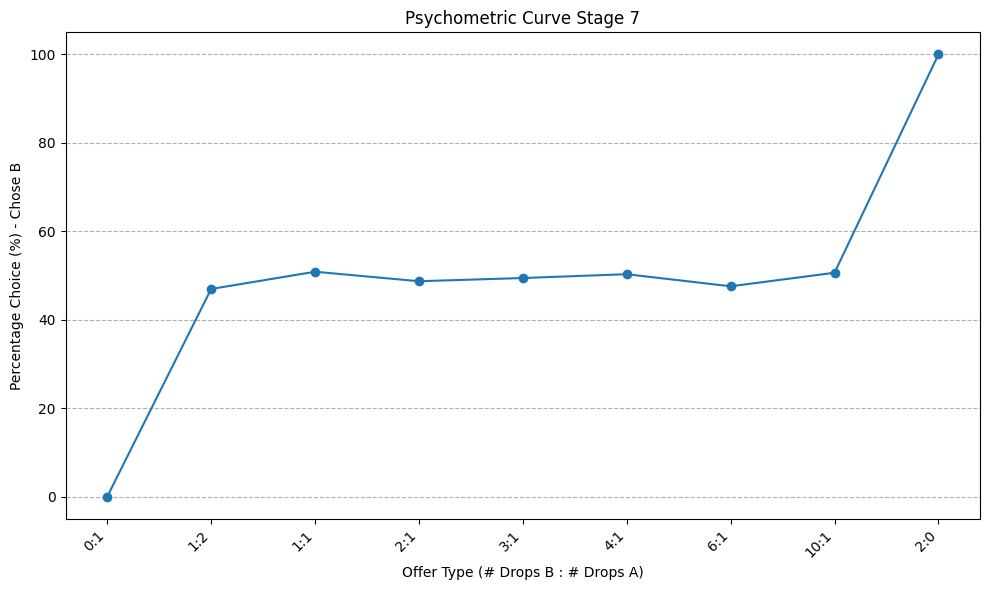

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_6'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_7'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 6 ---
    print("Loading masks from stage 6...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage6_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage6_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage6_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage6_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 6 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 7 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 7 finished.")

    # --- Save Checkpoint Stage 7 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 7 saved at: {path}")

    # --- Save Sparse Masks Stage 7 ---
    print("Saving masks for stage 7...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage7_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage7_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage7_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage7_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 7.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 7")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 7...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_7/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 2.02	State [0.  1.  0.2 0.1]	Actor Loss: 0.0017	Critic Loss: 0.0181
Episode 200	Total Reward: 1.03	State [0.  1.  0.1 0.2]	Actor Loss: -0.0144	Critic Loss: 1.4145
Episode 300	Total Reward: 2.22	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0026	Critic Loss: 0.0071
Episode 400	Total Reward: 2.23	State [ 0.  -1.   0.1  0.4]	Actor Loss: 0.0176	Critic Loss: 0.0020
Episode 500	Total Reward: 0.05	State [ 0.  -1.   0.   0.2]	Actor Loss: 0.0023	Critic Loss: 4.8356
Episode 600	Total Reward: 2.22	State [ 0.  -1.   0.1  0. ]	Actor Loss: 0.0026	Critic Loss: 0.0048
Episode 700	Total Reward: 2.26	State [ 0.  -1.   0.1  1. ]	Actor Loss: 0.0036	Critic Loss: 0.0024
Episode 800	Total Reward: 2.24	State [ 0.  -1.   0.1  0.4]	Actor Loss: 0.0026	Critic Loss: 0.0003
Episode 900	Total Reward: 3.04	State [0.  1.  0.3 0.1]	A

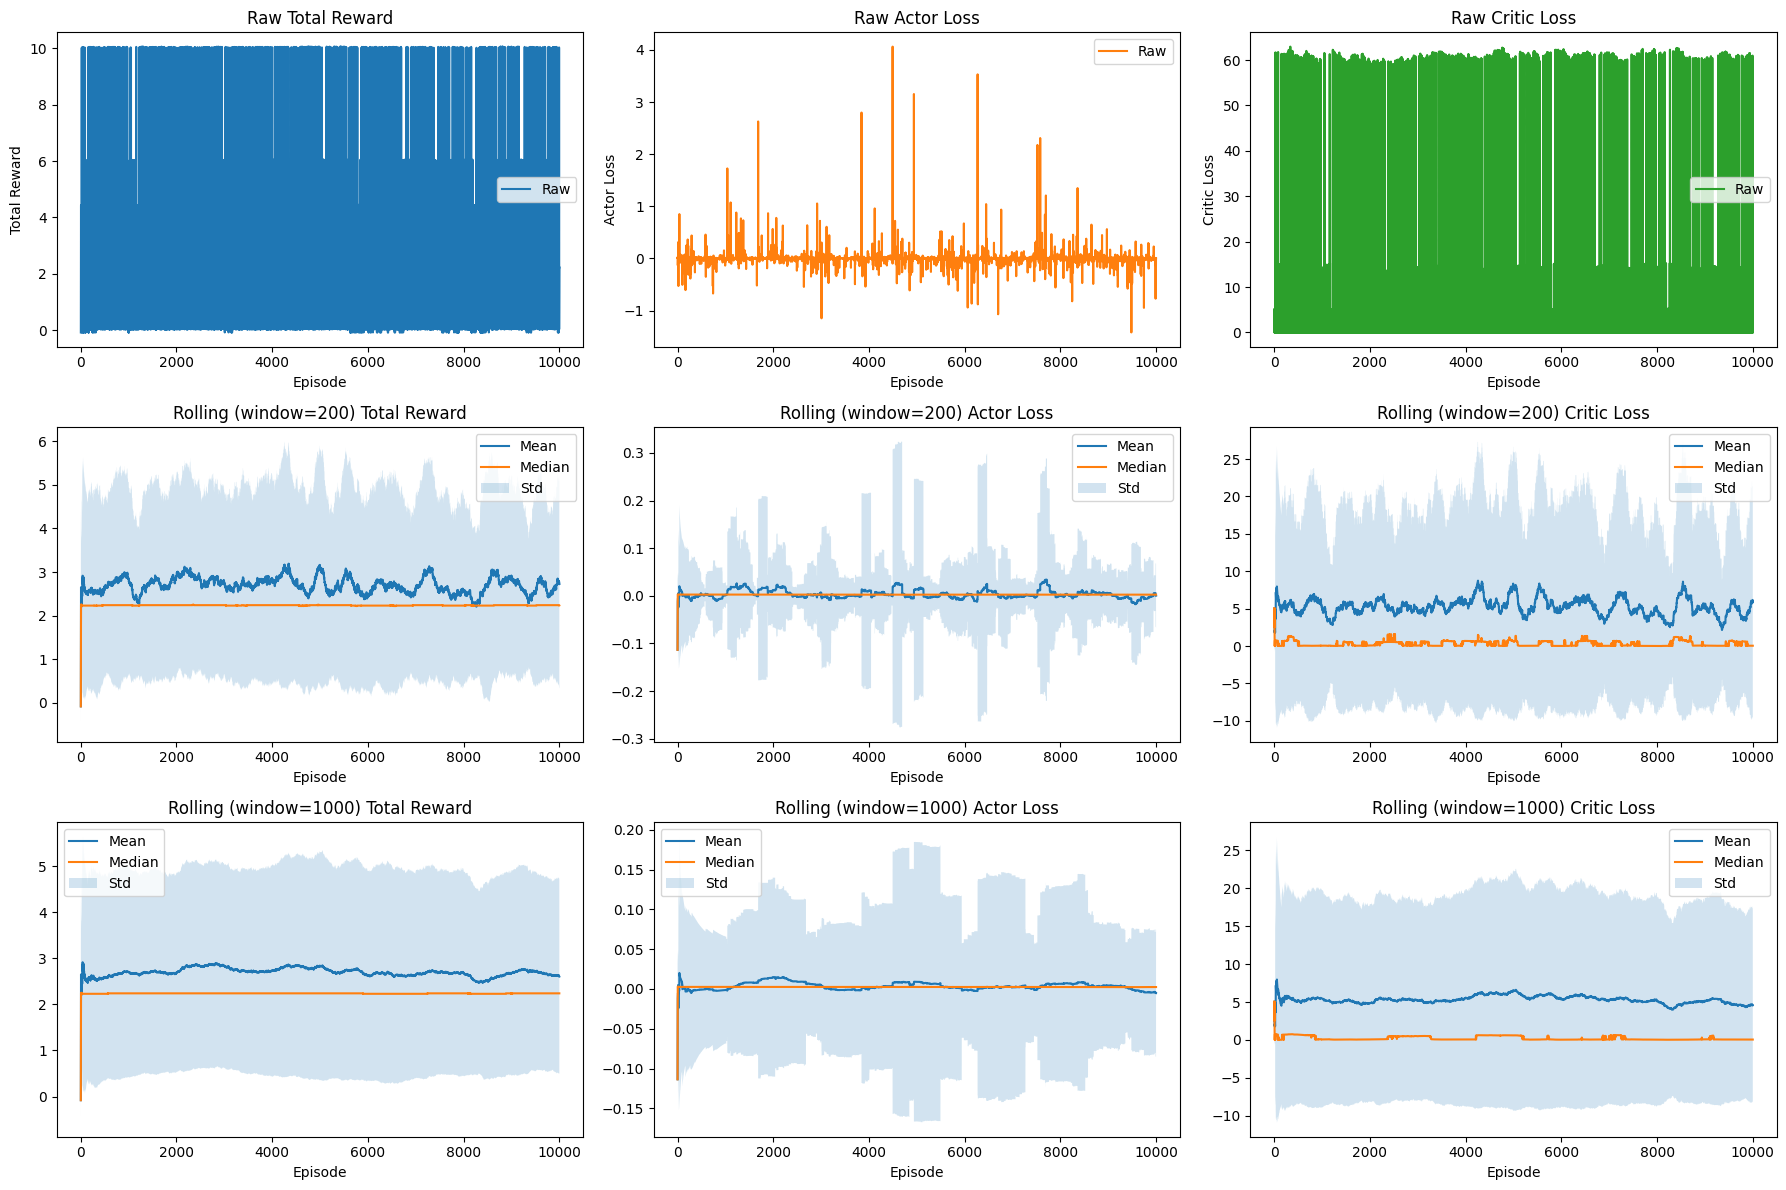

Plotting psychometric curve...


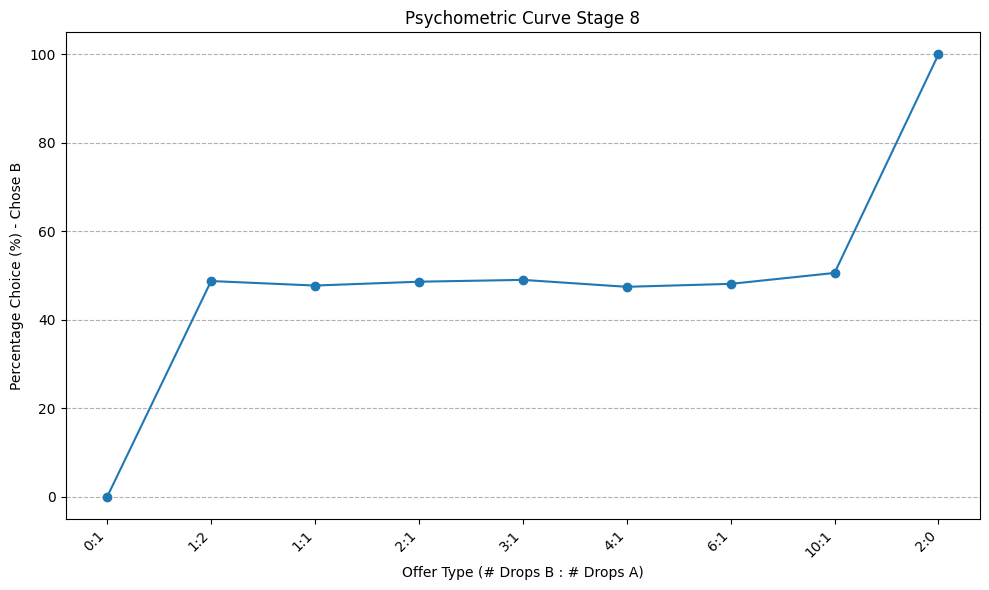

Closing environment...
Done.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_7'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_8'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 7 ---
    print("Loading masks from stage 7...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage7_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage7_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage7_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage7_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 7 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 8 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 8 finished.")

    # --- Save Checkpoint Stage 8 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 8 saved at: {path}")

    # --- Save Sparse Masks Stage 8 ---
    print("Saving masks for stage 8...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage8_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage8_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage8_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage8_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 8.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 8")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.002
  critic_lr: 0.002
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


2025-05-17 18:35:38.843090: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Loading masks from stage 8...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_8/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 2.03	State [0.  1.  0.2 0. ]	Actor Loss: 0.0025	Critic Loss: 0.0093
Episode 200	Total Reward: 2.25	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0026	Critic Loss: 0.0001
Episode 300	Total Reward: 6.02	State [0.  1.  0.6 0.1]	Actor Loss: 0.0272	Critic Loss: 14.7053
Episode 400	Total Reward: 2.22	State [ 0.  -1.   0.1  0.3]	Actor Loss: 0.0026	Critic Loss: 0.0002
Episode 500	Total Reward: 6.05	State [0.  1.  0.6 0.1]	Actor Loss: 0.0027	Critic Loss: 14.9926
Episode 600	Total Reward: 3.04	State [0.  1.  0.3 0.1]	Actor Loss: 0.0378	Critic Loss: 0.7062
Episode 700	Total Reward: 1.02	State [0.  1.  0.1 0.1]	Actor Loss: 0.0022	Critic Loss: 1.2969
Episode 800	Total Reward: 3.02	State [0.  1.  0.3 0.1]	Actor Loss: 0.0025	Crit

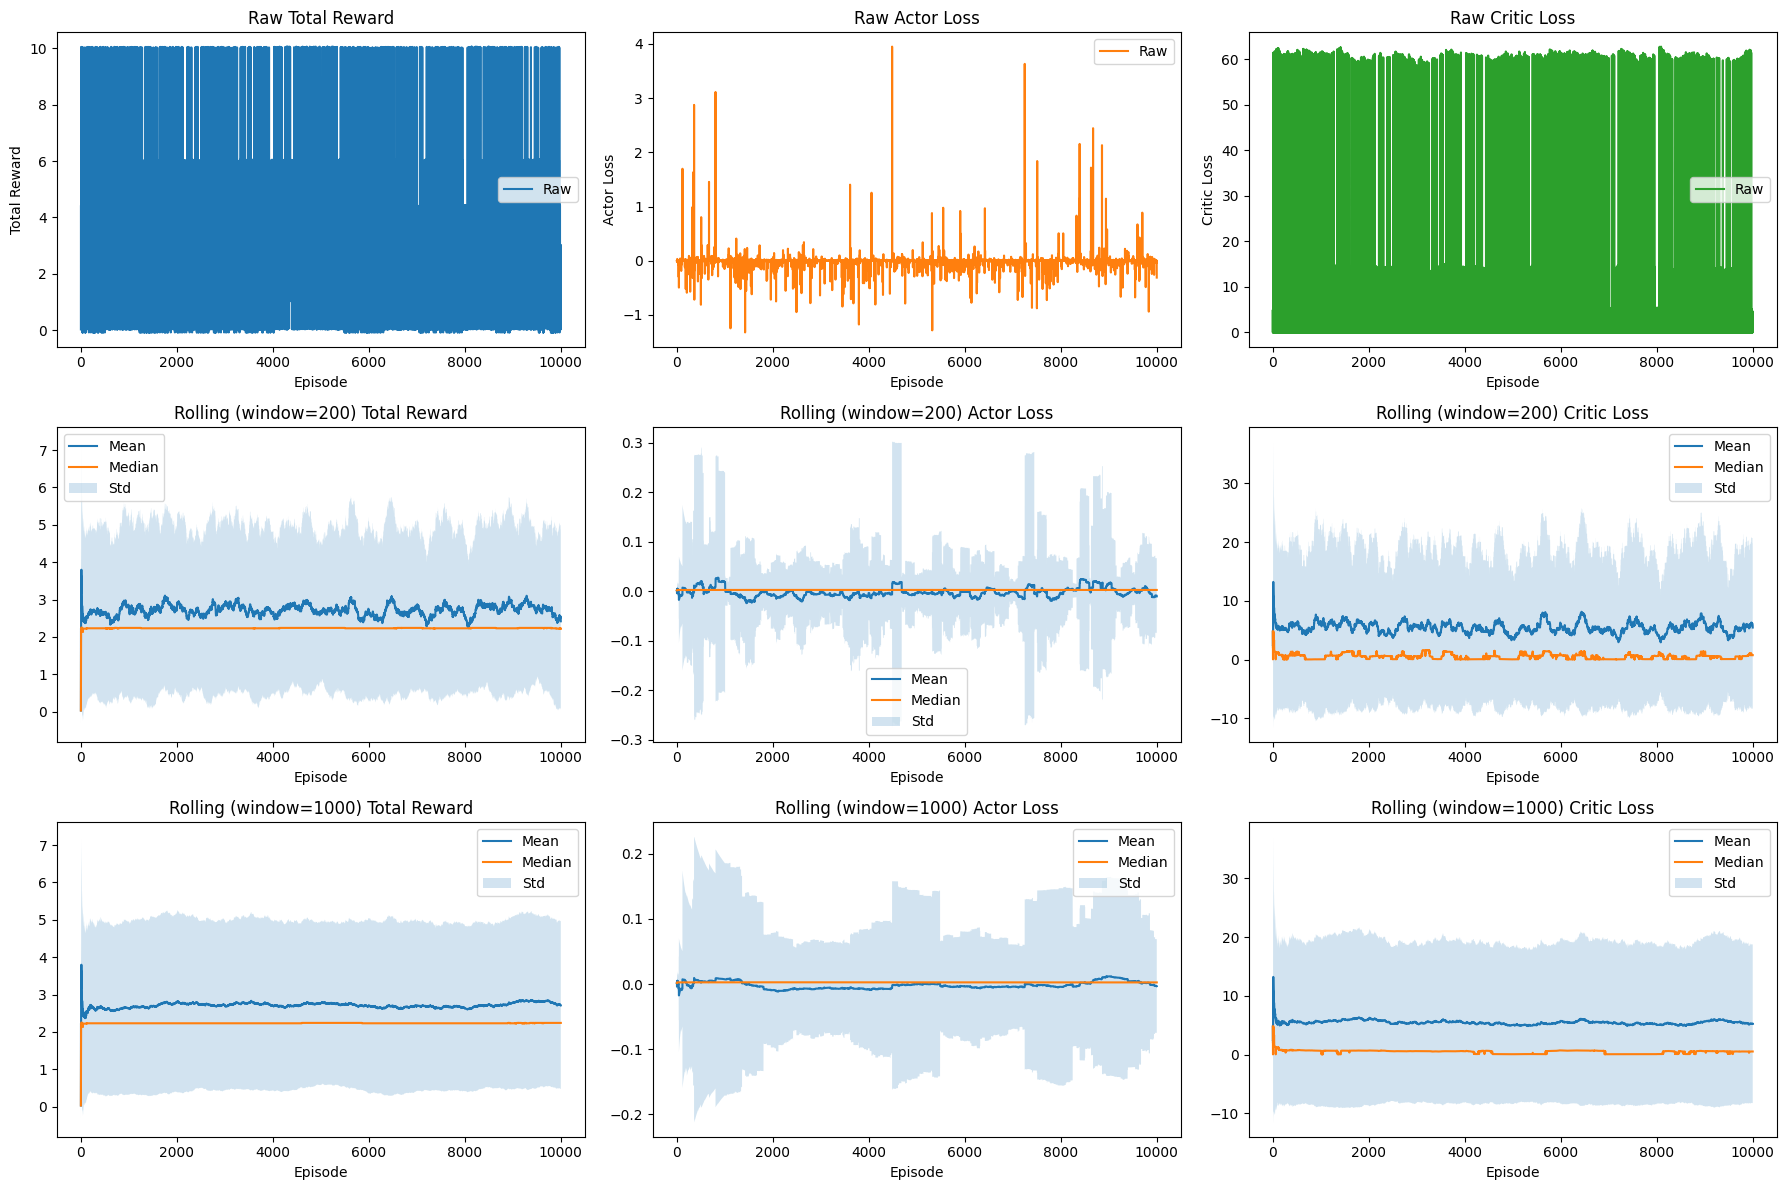

Plotting psychometric curve...


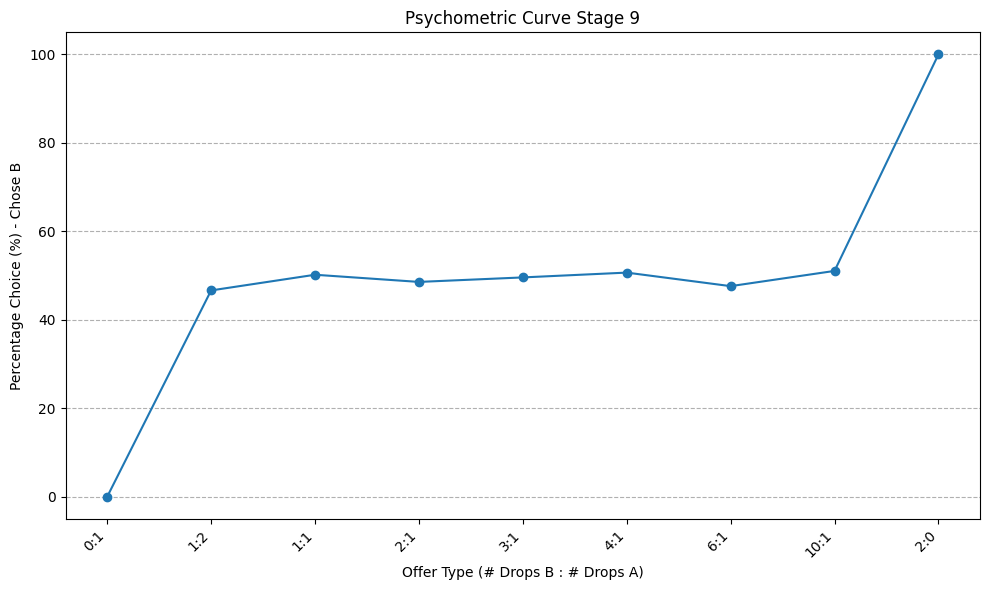

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_8'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_9'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 8 ---
    print("Loading masks from stage 8...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage8_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage8_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage8_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage8_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 8 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 9 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 9 finished.")

    # --- Save Checkpoint Stage 9 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 9 saved at: {path}")

    # --- Save Sparse Masks Stage 9 ---
    print("Saving masks for stage 9...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage9_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage9_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage9_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage9_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 9.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 9")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 900,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_9'
    this_ckpt_dir = 'checkpoints/rnn_nohold_max_stage_10'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 9 ---
    print("Loading masks from stage 9...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage9_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage9_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage9_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage9_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 9 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 10 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 10 finished.")

    # --- Save Checkpoint Stage 10 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 10 saved at: {path}")

    # --- Save Sparse Masks Stage 10 ---
    print("Saving masks for stage 10...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage10_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage10_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage10_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage10_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 9.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 10")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 9...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_max_stage_9/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 2.02	State [0.  1.  0.2 0.1]	Actor Loss: -0.0063	Critic Loss: 0.0192
Episode 200	Total Reward: 1.05	State [0.  1.  0.1 0.2]	Actor Loss: -0.0097	Critic Loss: 1.3801
Episode 300	Total Reward: 2.22	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0029	Critic Loss: 0.0024
Episode 400	Total Reward: 2.23	State [ 0.  -1.   0.1  0.4]	Actor Loss: 0.0026	Critic Loss: 0.0015
Episode 500	Total Reward: 0.03	State [ 0.  -1.   0.   0.2]	Actor Loss: 0.0025	Critic Loss: 4.8321
Episode 600	Total Reward: 2.22	State [ 0.  -1.   0.1  0. ]	Actor Loss: 0.0025	Critic Loss: 0.0018
Episode 700	Total Reward: 2.23	State [ 0.  -1.   0.1  1. ]	Actor Loss: 0.0026	Critic Loss: 0.0006
Episode 800	Total Reward: 2.25	State [ 0.  -1.   0.1  0.4]	Actor Loss: 0.0026	Critic Loss: 0.0005
Episode 900	Total Reward: 3.02	State [0.  1.  0.3 0.1]	